### Bài 2: Sử dụng Numpy xây dựng phương pháp Softmax Regression và Gradient Descent. Tiến hành huấn luyện phương pháp Logistic Regression và trực quan hoá giá trị của hàm loss trong toàn bộ quá trình huấn luyện.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv("D:\DS102\Thực hành\DS102\lab-2\data.csv", sep = ";")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [38]:
df.dtypes

,0
Marital status,int64
Application mode,int64
Application order,int64
Course,int64
Daytime/evening attendance\t,int64
Previous qualification,int64
Previous qualification (grade),float64
Nacionality,int64
Mother's qualification,int64
Father's qualification,int64


#### Chuẩn hóa data

In [55]:
#Get continuous
continuous_features = []
for col in df.columns:
    if df[col].dtype == 'float64':
        continuous_features.append(col)

print(len(continuous_features))
continuous_features

7


['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [56]:
normalized_data = df.copy()

for col in continuous_features:
    std = normalized_data[col].std()
    if std != 0:  # Tránh lỗi chia cho 0
       normalized_data[col] = (normalized_data[col] - normalized_data[col].mean()) / std

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,2
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,2
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,2
4420,1,1,2,9773,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,1
4421,1,1,1,9500,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,1
4422,1,1,1,9147,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,2


In [57]:
def encoder_target(result):
    mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

    # Handle cases where the key is not found in the mapping dictionary
    return mapping.get(result, -1) # or any other default value you prefer

# Apply to your DataFrame column
df['Target'] = df['Target'].apply(encoder_target)

In [60]:
normalized_data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
1,1,15,1,9254,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,2
2,1,1,5,9070,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
3,1,17,2,9773,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,2
4,2,39,1,8014,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,2
5,2,39,1,9991,0,19,0.036903,1,37,37,...,0,5,17,5,0.243685,5,1.739535,-0.671166,-0.406165,2
6,1,1,1,9500,1,1,0.711742,1,19,38,...,0,8,8,8,0.789665,0,1.476757,1.136876,-1.789464,2
7,1,18,4,9254,1,1,-1.032224,1,37,37,...,0,5,5,0,-1.963267,0,1.476757,1.136876,-1.789464,1
8,1,1,3,9238,1,1,0.332619,62,1,1,...,0,6,7,6,0.750872,0,1.739535,-0.671166,-0.406165,2
9,1,1,1,9238,1,1,0.408443,1,1,19,...,0,6,14,2,0.627502,0,-1.000859,0.124372,1.545432,1


In [61]:
course_dict = {}
i = 0

for id in normalized_data['Course'].unique():
    course_dict.update({id : i})
    i += 1

def convert_coures_id(id: int) -> int:
    return course_dict[id]

normalized_data['Course'] = normalized_data['Course'].apply(convert_coures_id)

normalized_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,0,1,1,-0.804750,1,19,12,...,0,0,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
1,1,15,1,1,1,1,2.076585,1,1,3,...,0,6,6,6,0.659487,0,0.876123,-1.105097,0.347160,2
2,1,1,5,2,1,1,-0.804750,1,37,37,...,0,6,0,0,-1.963267,0,-0.287606,0.124372,0.765674,1
3,1,17,2,3,1,1,-0.804750,1,38,37,...,0,6,10,5,0.416403,0,-0.813161,-1.466705,-1.375356,2
4,2,39,1,4,0,1,-2.472892,1,37,38,...,0,6,6,6,0.531548,0,0.876123,-1.105097,0.347160,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,3,1,1,-0.577276,1,1,1,...,0,6,8,5,0.467578,0,1.476757,1.136876,-1.789464,2
4420,1,1,2,3,1,1,-0.956399,105,1,1,...,0,6,6,2,0.147730,0,-0.174987,-0.454201,0.889026,1
4421,1,1,1,6,1,1,1.621637,1,37,37,...,0,8,9,1,0.627502,0,0.876123,-1.105097,0.347160,1
4422,1,1,1,13,1,1,3.593077,1,37,37,...,0,5,6,5,0.339639,0,-0.813161,-1.466705,-1.375356,2


### Xây dựng Softmax Regression

In [82]:
from logging import logProcesses
from tqdm import tqdm

class SoftmaxRegression:
    def __init__(self, epoch: int = 1000, lr: float = 0.01) -> None:
        self.epoch = epoch
        self.lr = lr
        self.losses = []
        self.metrics = []
        self.theta = None

    def softmax(self, z: np.ndarray) -> np.ndarray:
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Tránh overflow
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def loss_fn(self, y: np.ndarray, y_hat: np.ndarray) -> float:
        return -np.mean(np.sum(y * np.log(y_hat + 1e-6), axis=1))

    def accuracy(self, y: np.ndarray, y_pre: np.ndarray) -> float:
       return (1 - np.abs(y-y_pre)).mean()

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        n, d = X.shape
        n_classes = y.shape[-1]
        self.theta = np.zeros((d, n_classes), dtype=np.float64)

        with tqdm(range(self.epoch)) as pb:
            for e in pb:
                s = self.predict(X)
                s_c = s - y  # Gradient descent update
                gradient = (1 / n) * np.dot(X.T, s_c)
                self.theta -= self.lr * gradient

                # Evaluate performance
                s = self.predict(X)
                loss = self.loss_fn(y, s)
                acc = self.accuracy(y.argmax(axis=-1), s.argmax(axis=-1))

                pb.set_postfix({"loss": loss, "acc": acc})
                self.losses.append(loss)
                self.metrics.append(acc)

    def predict(self, X: np.ndarray) -> np.ndarray:
        logits = np.dot(X, self.theta)
        return self.softmax(logits)

In [83]:
# Chuyển đổi nhãn thành One-Hot Encoding
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

In [84]:
# Split data into train and test set

data = normalized_data.to_numpy()

data_train, data_test = np.split(data, indices_or_sections=[int(0.8*data.shape[0])])

X_train = data_train[:,:36]
Y_train = data_train[:,36]

X_test = data_test[:,:36]
Y_test = data_test[:,36]

In [85]:
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

Y_train = Y_train.astype(np.int64)
Y_test = Y_test.astype(np.int64)

y_one_hot = one_hot_encode(Y_train, num_classes=3)

In [86]:
#Training
softmax_reg = SoftmaxRegression(1000,0.0001)
softmax_reg.fit(X_train,y_one_hot)


100%|██████████| 1000/1000 [00:05<00:00, 169.47it/s, loss=0.823, acc=0.544]


In [87]:
predicted = softmax_reg.predict(X_test)
Y_test_one_hot = np.eye(len(np.unique(Y_test)))[Y_test]
print('Accuracy: ', softmax_reg.accuracy(Y_test_one_hot, predicted))

Accuracy:  0.6542777756358711


### Visualize loss funtion

<ipython-input-89-29261fb67c36>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


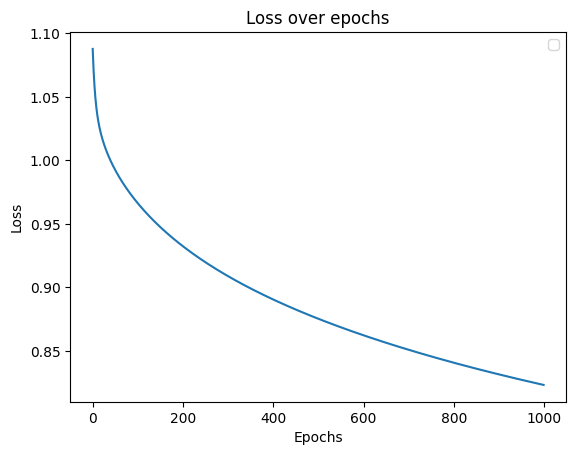

In [89]:
plt.plot(range(len(softmax_reg.losses)), softmax_reg.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.legend()
plt.show()